In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.93099033],
       [3.17517236]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93099033],
       [10.28133506]])

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.93099033],
       [10.28133506]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.93099033],
       [3.17517236]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.93099033],
       [3.17517236]])

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[3.93099033],
       [3.17517236]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[3.92384948],
       [3.17469669]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86439087]), array([3.1810559]))

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([1.11400843, 1.24101477])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95620789]), array([[1.03584076, 0.5153139 ]]))

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

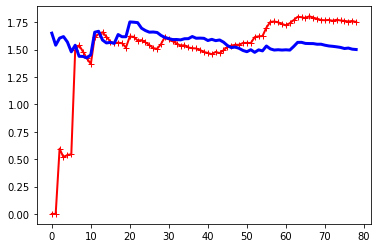

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

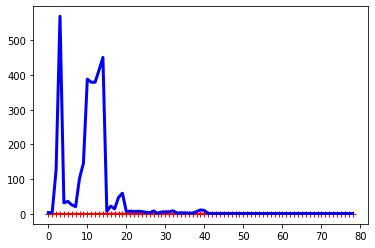

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.89034286]])

In [22]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.8913869])

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.84075377])

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.84350285])

In [25]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

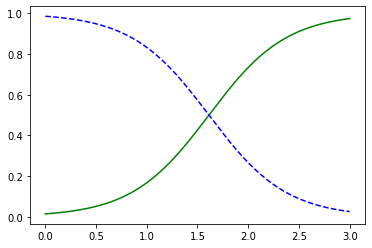

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')

In [29]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [30]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,3]])

array([[8.83643458e-10, 8.64916081e-05, 9.99913508e-01]])

# Exercises

### Question 1

1. Which Linear Regression training algorithm can you use if you have a training set with millions of features?

Stochastic Gradient Descent or Mini-Batch gradient descent as these both work with individual data points. You would use Batch Gradient Descent if you can fit every instance in memory. Ultimately, do not use Normal Equation or SVD as the complexity ramps up signifanctly with the number of features.

2. Suppose the features in your training set have very different scalers. Which algorithms might suffer from this, and how? What can you do about it?

Gradient Descent will not work well due to the amount of time required to converge, however SVD and Normal equation would work fine. A solution to get Gradient Descent to work is to scale your model appropriately. Scaling your model with the support of scikit learn ensures that you get a model within a certain range. 

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression Model?

No, Gradient Descent does not get stuck in a local minimum, as it will always converge to global minimum due to Logistic Regression being a convex function.

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

All Gradient Descent algorithms can lead to the same model, given a couple key conditions. The functions being evaluated need to be convex so that a minimum exists. Second, The learning rate cannot be too high. If the learning rate is even slightly too high for Stochiastic and Mini-Batch Gradient Descent, then they will bounce around the minimum and never meet it.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

If the validation error begins to consistently go up, then your learning rate is too high, and thus the solution is diverging. Adjusting the learning rate will assist in ensuring your validation errors go down and your function converges. If your training errors also go up, despite a fix to the learning rate, then you are overfitting and will need to early stop to get an optimal solution.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No, Mini Batch may jump around the global optimum, so the validation error may go up and back down a couple times. An optimal solution would be to check in specific intervals for the lowest error, and if Mini-Batch Gradient Descent goes up too many times, revert to the best solution.